In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A. An overview of the dataset

#### 1.Import the data as a pandas DataFrame into your notebook.

In [2]:
# getting the data
df = pd.read_pickle('data_385k.pkl', compression='zip')

#### 2.Check the number of rows and columns. You should have 385’384 samples and 99 columns.

In [3]:
df.shape[0] #number of rows

385384

In [4]:
df.shape[1] #number of columns

99

In [5]:
df.shape 

(385384, 99)

#### 3.Display a few entries from the DataFrame.

In [6]:
df.head(5) # Show the first 5 entries 

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.Check the data type for each column. Create separate lists to hold the names of columns of the same data type.

In [7]:
df.info() # show data type for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

In [8]:
# In previous line of code, we can see 3 types of data : float64(50), int64(1), object(48)
# lists to hold column names of each data type
int_cols = []
str_cols = []
float_cols = []

# loop through columns type and categorize them 
for col in df.columns:
    if df[col].dtype == 'int64':
        int_cols.append(col)
    elif df[col].dtype == 'float64':
        float_cols.append(col)
    elif df[col].dtype == 'object':
        str_cols.append(col)

# print out lists
print(f'Integer Columns: {int_cols}')
print(f'\nFloat Columns: {float_cols}')
print(f'\nString Columns: {str_cols}')

Integer Columns: ['id']

Float Columns: ['alcohol_by_volume', 'calcium_per_hundred', 'carbohydrates_per_hundred', 'carbohydrates_per_portion', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_kcal_per_portion', 'energy_per_hundred', 'energy_per_portion', 'fat_per_hundred', 'fat_per_portion', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'portion_quantity', 'potassium_k_per_hundred', 'protein_per_hundred', 'protein_per_portion', 'quantity', 'salt_per_hundred', 'salt_per_portion', 'saturated_fat_per_hundred', 'saturated_fat_per_portion', 'sodium_per_hundred', 'sodium_per_portion',

#### 5. Check the data by the type of information they hold. Create 3 lists that hold _per_hundred, _per_portion and _unit columns. Put the remaining column names in a 4th list named other_cols.

In [9]:
# lists to hold column names of each data type
per_hundred_cols = []
per_portion_cols = []
unit_cols = []
other_cols = []

# loop through column's names and categorize them 
for col in df.columns:
    if col.endswith("per_hundred"):
        per_hundred_cols.append(col)
    elif col.endswith("_per_portion"):
        per_portion_cols.append(col)
    elif col.endswith("_unit"):
        unit_cols.append(col)
    else:
        other_cols.append(col)

# print out lists
print(f'per_hundred columns: {per_hundred_cols}')
print(f'\nper_portion columns: {per_portion_cols}')
print(f'\nunit columns: {unit_cols}')
print(f'\nother columns: {other_cols}')

per_hundred columns: ['calcium_per_hundred', 'carbohydrates_per_hundred', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'potassium_k_per_hundred', 'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred', 'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred', 'vitamin_a_iu_per_hundred', 'vitamin_b12_cobalamin_per_hundred', 'vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred', 'vitamin_b5_panthothenic_acid_per_hundred', 'vitamin_b6_pyridoxi

# B. Preliminary Exploratory Data Analysis

#### 1. Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?

In [10]:
df.duplicated().sum() # number of duplicated rows

10500

In [11]:
df = df.drop_duplicates() # drop duplicated rows

In [12]:
df.shape #  shape of the data

(374884, 99)

#### 2.Show the proportion of missing values in the data using appropriate visualizations and numerical summaries.

* Create a table that ranks the number and percentage of missing values for all columns.

In [13]:
pd.options.display.max_rows = 100 # show all the names in the table
qty_null_values = df.isnull().sum().sort_values(ascending = False) #count the number null values
percent_null_values = (qty_null_values/df.shape[0])*100 
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values

,qty_null_values,percent_null_values
sodium_per_portion,374131,99.8
fiber_insoluble_per_hundred,371375,99.1
fiber_insoluble_unit,371374,99.1
manganese_mn_per_hundred,371350,99.1
manganese_mn_unit,371347,99.1
copper_cu_per_hundred,371273,99.0
copper_cu_unit,371273,99.0
fiber_soluble_per_hundred,371057,99.0
fiber_soluble_unit,371055,99.0
folic_acid_per_hundred,370428,98.8


* Use the missingno library to visualize where the missing are located in the whole data frame and how they relate to each other. Comment on what you observe.

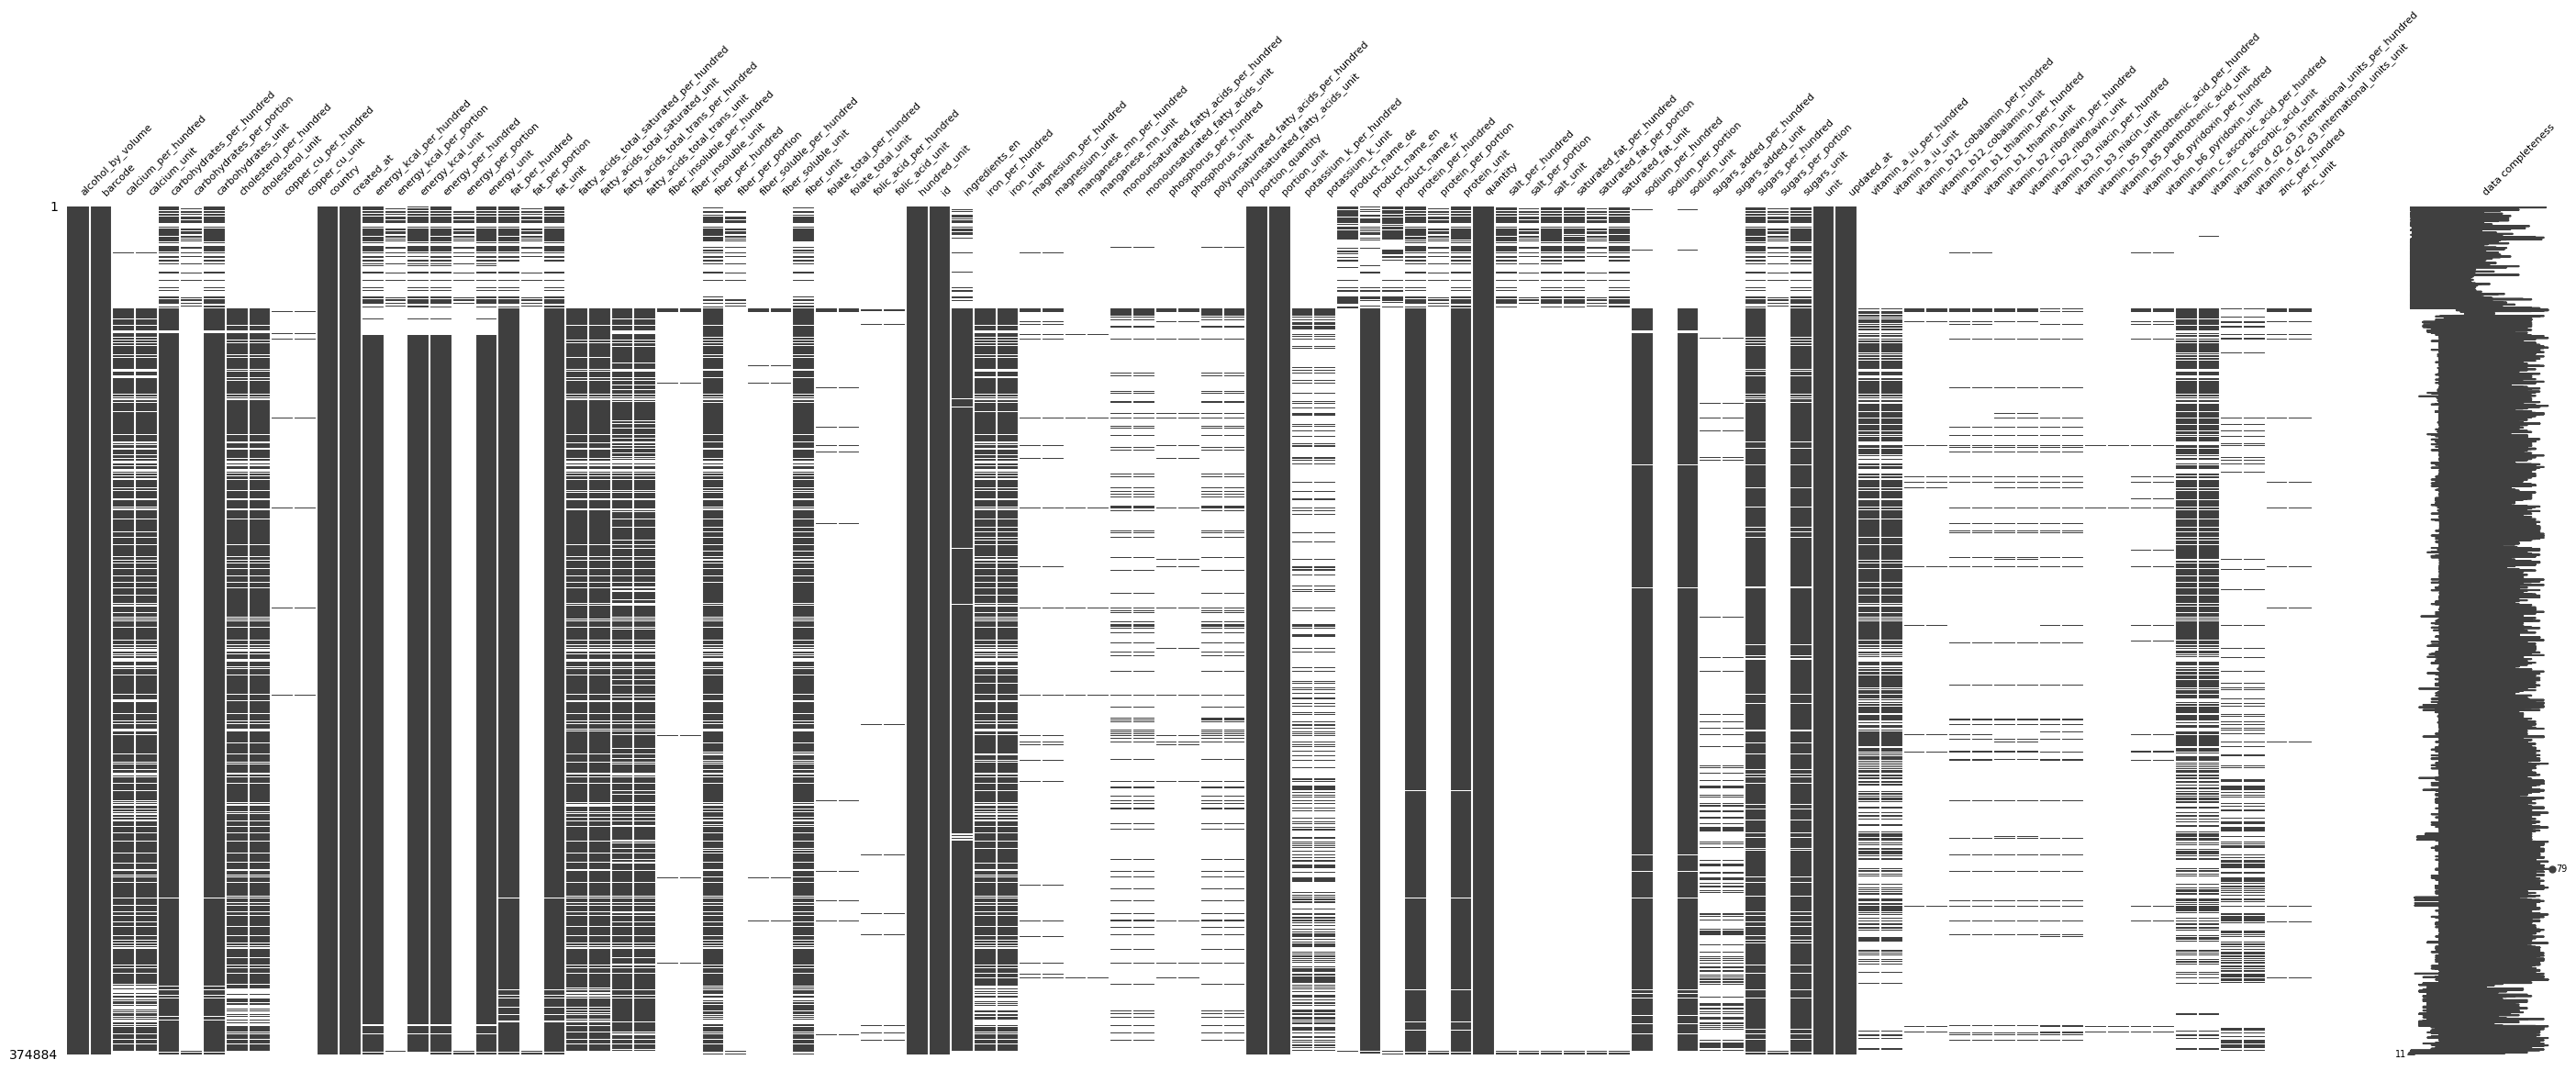

In [14]:
import missingno as msno
msno.matrix(df, labels=True, fontsize=8, figsize=(35,12));

The previous plot helps us to visualize the missing data in the whole dataframe, here my observations:
 - Data completeness is between 11 (min) and 79 (max) columns 
 - There are two types of Columns:
     - where data seems to be complete such as: barcode, country, created_at, ...  
     - where data seems to be almost empty such as: copper_cu_per_hundred, fiber_insoluble_per_hundred, manganese_mm_per_hundred
 - The first rows seem different from the others 

* Create 4 line plots or bar charts that show the percentages of missing values in the 4 lists you created in A.5.

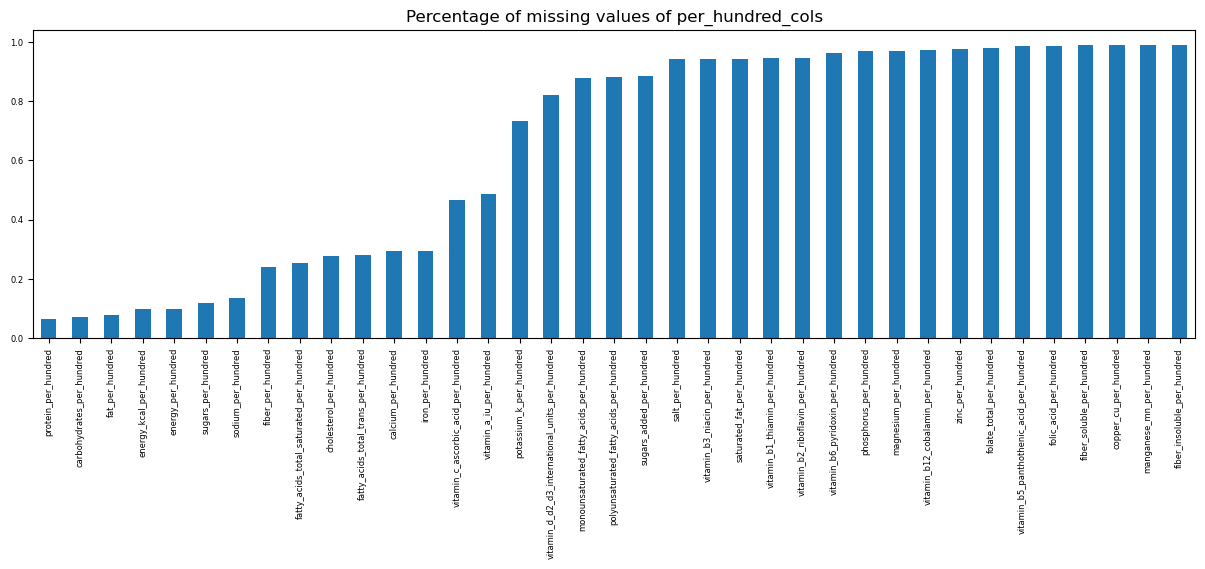

In [15]:
df[per_hundred_cols].isna().mean().sort_values().plot(kind="bar", figsize=(15, 4), title="Percentage of missing values of per_hundred_cols", fontsize=6); 

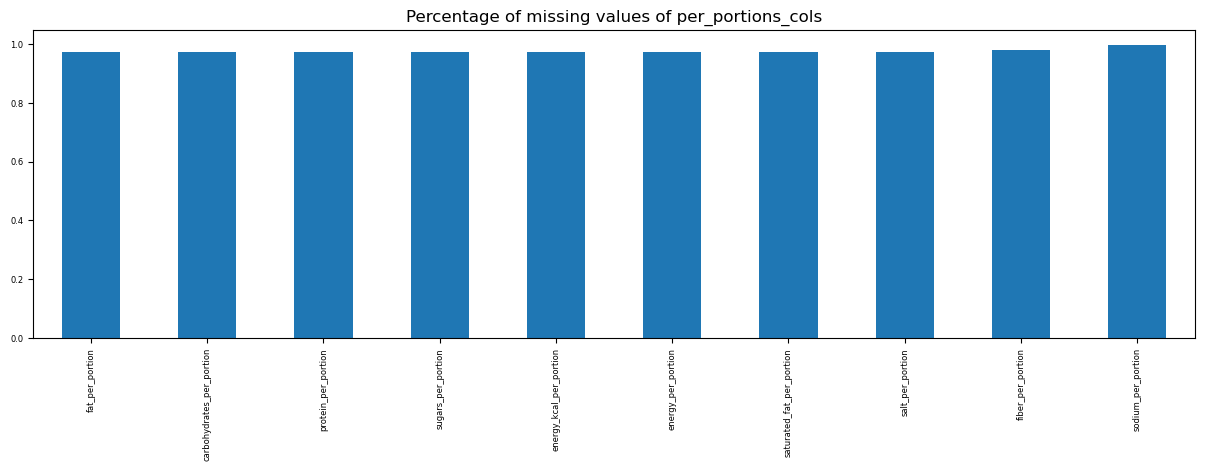

In [16]:
df[per_portion_cols].isna().mean().sort_values().plot(kind="bar", figsize=(15, 4), title="Percentage of missing values of per_portions_cols", fontsize=6);

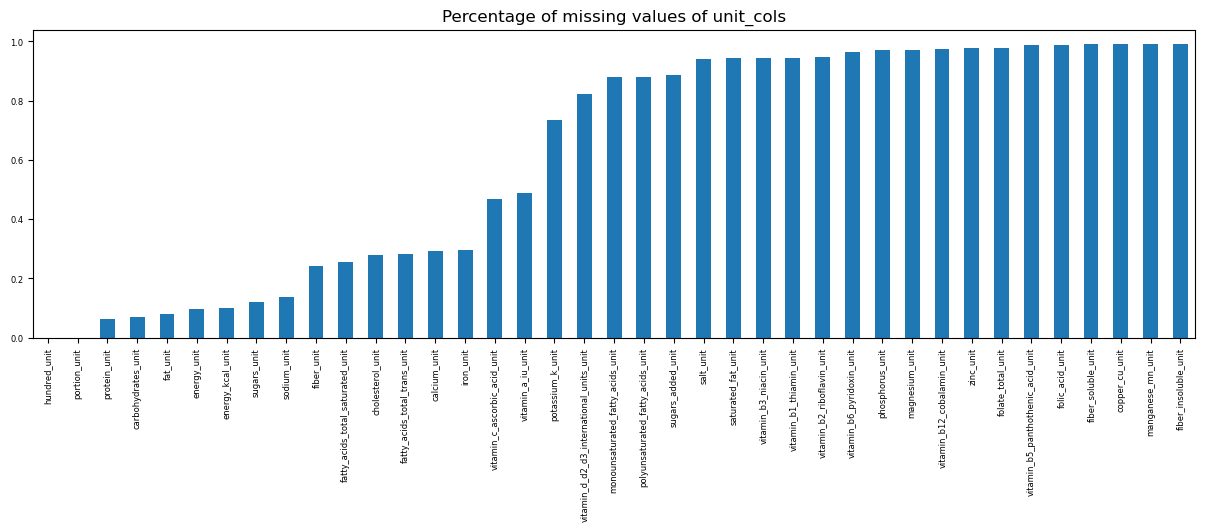

In [17]:
df[unit_cols].isna().mean().sort_values().plot(kind="bar", figsize=(15, 4), title="Percentage of missing values of unit_cols", fontsize=6);

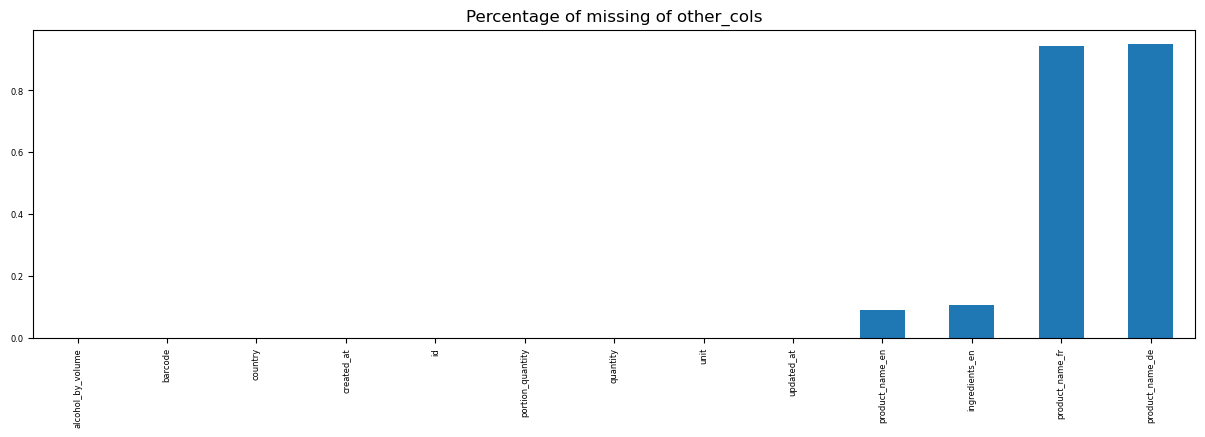

In [18]:
df[other_cols].isna().mean().sort_values().plot(kind="bar", figsize=(15, 4), title="Percentage of missing of other_cols", fontsize=6);

#### 3.Now that you know the extent of missing values in the data, you should address them. Your goal is to keep as much data as possible in your DataFrame. What is the shape of the remaining data?

* As a first step, remove rows and columns that are completely empty (if there is any).

In [19]:
qty_null_values = df.isnull().sum().sort_values(ascending = False)
percent_null_values = (qty_null_values/df.shape[0])*100
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values.head()

,qty_null_values,percent_null_values
sodium_per_portion,374131,99.8
fiber_insoluble_per_hundred,371375,99.1
fiber_insoluble_unit,371374,99.1
manganese_mn_per_hundred,371350,99.1
manganese_mn_unit,371347,99.1


In [20]:
qty_null_values = df.isnull().sum(axis=1).sort_values(ascending = False)
percent_null_values = (qty_null_values/df.shape[1])*100
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values.head()

,qty_null_values,percent_null_values
374883,88,88.9
28232,88,88.9
28285,88,88.9
28284,88,88.9
28274,88,88.9


We do no observe empty rows or columns in the dataframe

* Start with your list of _unit columns, and check some of them and show what information they hold. One simple approach to fill up missing values in categorical columns is to use the most frequent value as a proxy for the missing value. Apply this approach to the _unit columns.

In [21]:
df[unit_cols].head()

,calcium_unit,carbohydrates_unit,cholesterol_unit,copper_cu_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,...,vitamin_a_iu_unit,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_unit
0,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df.copy()
for col in df[unit_cols].columns:
    df.loc[:, col].fillna(df[col].value_counts().idxmax(), inplace=True)

In [23]:
df[unit_cols].head()

,calcium_unit,carbohydrates_unit,cholesterol_unit,copper_cu_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,...,vitamin_a_iu_unit,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_unit
0,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
1,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
2,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
3,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
4,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg


* As a second strategy, let’s fill up the missing values of a column using other columns that hold similar information. Apply this approach to the product_name_en. Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the number of rows that you managed to fill up.

In [24]:
df[['product_name_de','product_name_en','product_name_fr']].head(10)

,product_name_de,product_name_en,product_name_fr
0,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
1,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella
2,Caffè Mauro - Bio Kaffe,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - café bio
3,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - chocolat en poudre
4,Naturaplan ExtraDunkle Schokolade 70%,Naturaplan Extra Dark Chocolate 70%,Naturaplan Chocolat extra noir 70%
5,Cailler - Kakaopulver,NaN,Cailler - Poudre de cacao
6,Toblerone,Toblerone,Toblerone
7,Knöpflimehl,Knöpfli flour,Farine pour knoepfli
8,Naturaplan Bio Blütenhonig,Naturaplan Bio Flower Honey,Naturaplan Miel de fleurs Bio
9,NaN,Maltesers,NaN


In [25]:
# count the number of nan value in product_name_en
nb_of_na_values_init = df['product_name_en'].isna().sum() 

In [26]:
# Replace the missing value in product_name_en by product_name_fr
df['product_name_en'] = df.apply(lambda x: x['product_name_fr'] if pd.isna(x['product_name_en']) else x['product_name_en'], axis=1)

In [27]:
# Replace the missing value in product_name_en by product_name_de
df['product_name_en'] = df.apply(lambda x: x['product_name_de'] if pd.isna(x['product_name_en']) else x['product_name_en'], axis=1)

In [28]:
# Count the number of filled value in product_name_en
filled_values = nb_of_na_values_init - df['product_name_en'].isna().sum()
print(f" Number of filled values in 'product_name_en' :", filled_values)

 Number of filled values in 'product_name_en' : 14299


* As a third strategy, let’s fill up missing values based on some simplistic assumption. Take the column named iron_per_hundred which has about 30% missing values. One possible explanation for its missing values could be that those products are iron-free (like ice cream). Based on this assumption address the missing values for iron_per_hundred.

In [29]:
# Replace every missing value by '0' for per_hundred_cols
for col in df[per_hundred_cols].columns:
    df[col].fillna(0, inplace=True)

* Another strategy is to indicate that some of the fields are missing. For instance, the column ingredients_en has about 10% of missing values. Let’s replace them with the term ingredient_missing.

In [30]:
# replace missing values with text on df[other_cols] (product_name_en / fr / de and ingredient)
for col in df[other_cols].columns:
    text = col+'_missing'
    df[col].fillna(text, inplace=True)

* Finally, let’s assume that you want to build up your data analysis pipeline based on at least 20,000 rows of non-missing data per column. This amounts to about 5% of the rows in the data. Your task is to drop the columns that have more than 95% of missing values. What is the shape of the remaining data?

In [31]:
qty_null_values = df.isnull().sum().sort_values(ascending = False)
percent_null_values = (qty_null_values/df.shape[0])*100
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values.head(12)

,qty_null_values,percent_null_values
sodium_per_portion,374131,99.8
fiber_per_portion,366707,97.8
salt_per_portion,365170,97.4
saturated_fat_per_portion,365155,97.4
energy_per_portion,365089,97.4
energy_kcal_per_portion,364917,97.3
sugars_per_portion,364764,97.3
protein_per_portion,364608,97.3
carbohydrates_per_portion,364529,97.2
fat_per_portion,364478,97.2


In [32]:
# mask which has 'True' when 'percent_null_values' is greater than 95
entries_to_drop = df_null_values[df_null_values['percent_null_values'].gt(95)]
entries_to_drop = entries_to_drop.index.tolist()

# Dropping these entries by selecting the samples that should be dropped
df = df.drop(entries_to_drop, axis=1)

In [33]:
df.shape

(374884, 89)

#### 4.Let’s continue exploring the categorical variables in more detail. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

In [34]:
# Number of unique values in categorical variables
unique_values = df.select_dtypes(exclude="number").nunique().sort_values(ascending=False)
unique_values

barcode                                     374446
ingredients_en                              247228
product_name_en                             236676
updated_at                                   47015
created_at                                   46990
product_name_fr                              20984
product_name_de                              18573
unit                                            10
portion_unit                                     7
country                                          7
hundred_unit                                     3
vitamin_d_d2_d3_international_units_unit         1
protein_unit                                     1
salt_unit                                        1
saturated_fat_unit                               1
sodium_unit                                      1
vitamin_c_ascorbic_acid_unit                     1
vitamin_b6_pyridoxin_unit                        1
sugars_added_unit                                1
vitamin_a_iu_unit              

<AxesSubplot:title={'center':'Unique values per feature'}>

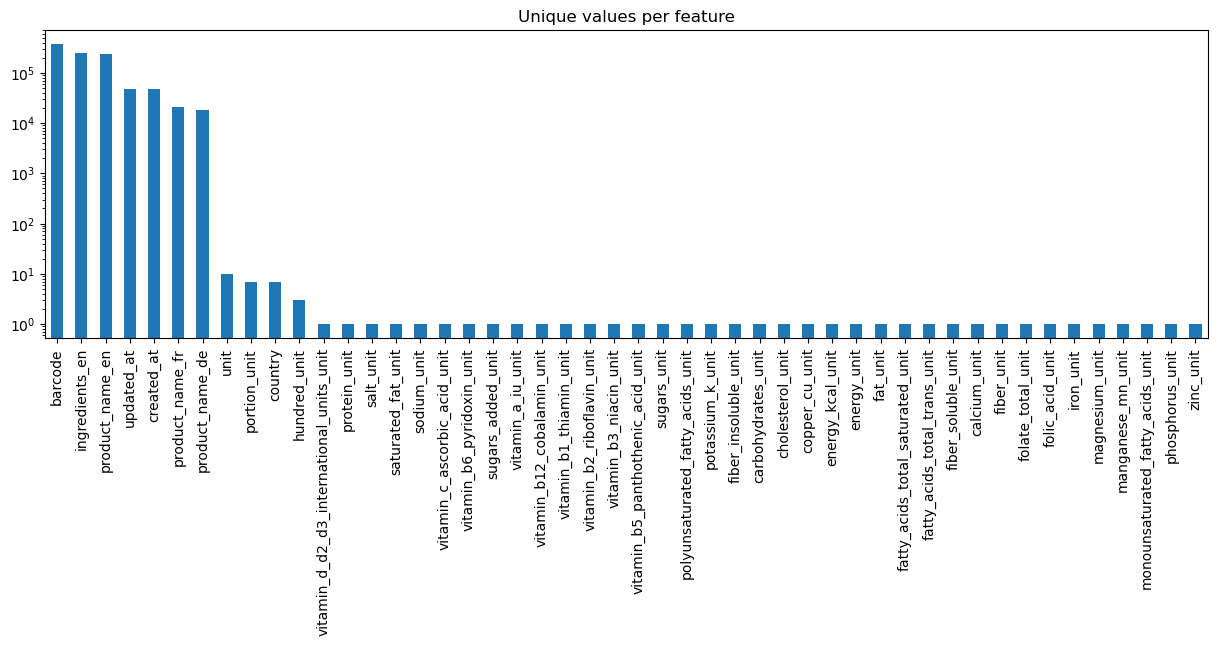

In [35]:
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

#### 5. Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

In [36]:
df.describe()

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,374884.000000,374884.000000,374884.000000,374884.000000,374884.00000,374884.000000,374884.000000,374884.000000,374884.000000,374884.000000,...,374884.000000,374884.000000,374884.000000,374884.000000,374884.000000,374884.000000,374884.000000,374884.000000,374884.000000,374884.000000
mean,0.027911,82.410910,31.616600,42.524086,0.05267,246.092327,1029.134302,11.701383,3.680967,0.025071,...,253.250104,0.454122,0.050358,0.088213,0.554647,0.162604,0.049283,8.378676,2.536350,0.138072
std,0.769066,2150.662993,40.335465,1642.986819,26.93915,258.352066,1079.990782,19.033360,7.645386,1.090158,...,1767.719011,65.450985,3.153991,32.678801,17.492059,38.277619,1.173616,426.375389,31.450794,16.448386
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.670000,0.000000,0.00000,53.000000,221.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,20.000000,0.000000,0.00000,233.000000,974.870000,3.740000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,71.000000,57.140000,10.000000,0.00000,393.000000,1644.310000,18.180000,5.130000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57.900000,684000.000000,6400.000000,250000.000000,16483.52000,39600.000000,165686.400000,3200.000000,1000.000000,615.380000,...,333333.000000,33898.310000,1111.000000,20000.000000,6785.710000,16920.470000,420.000000,210000.000000,5000.000000,10000.000000


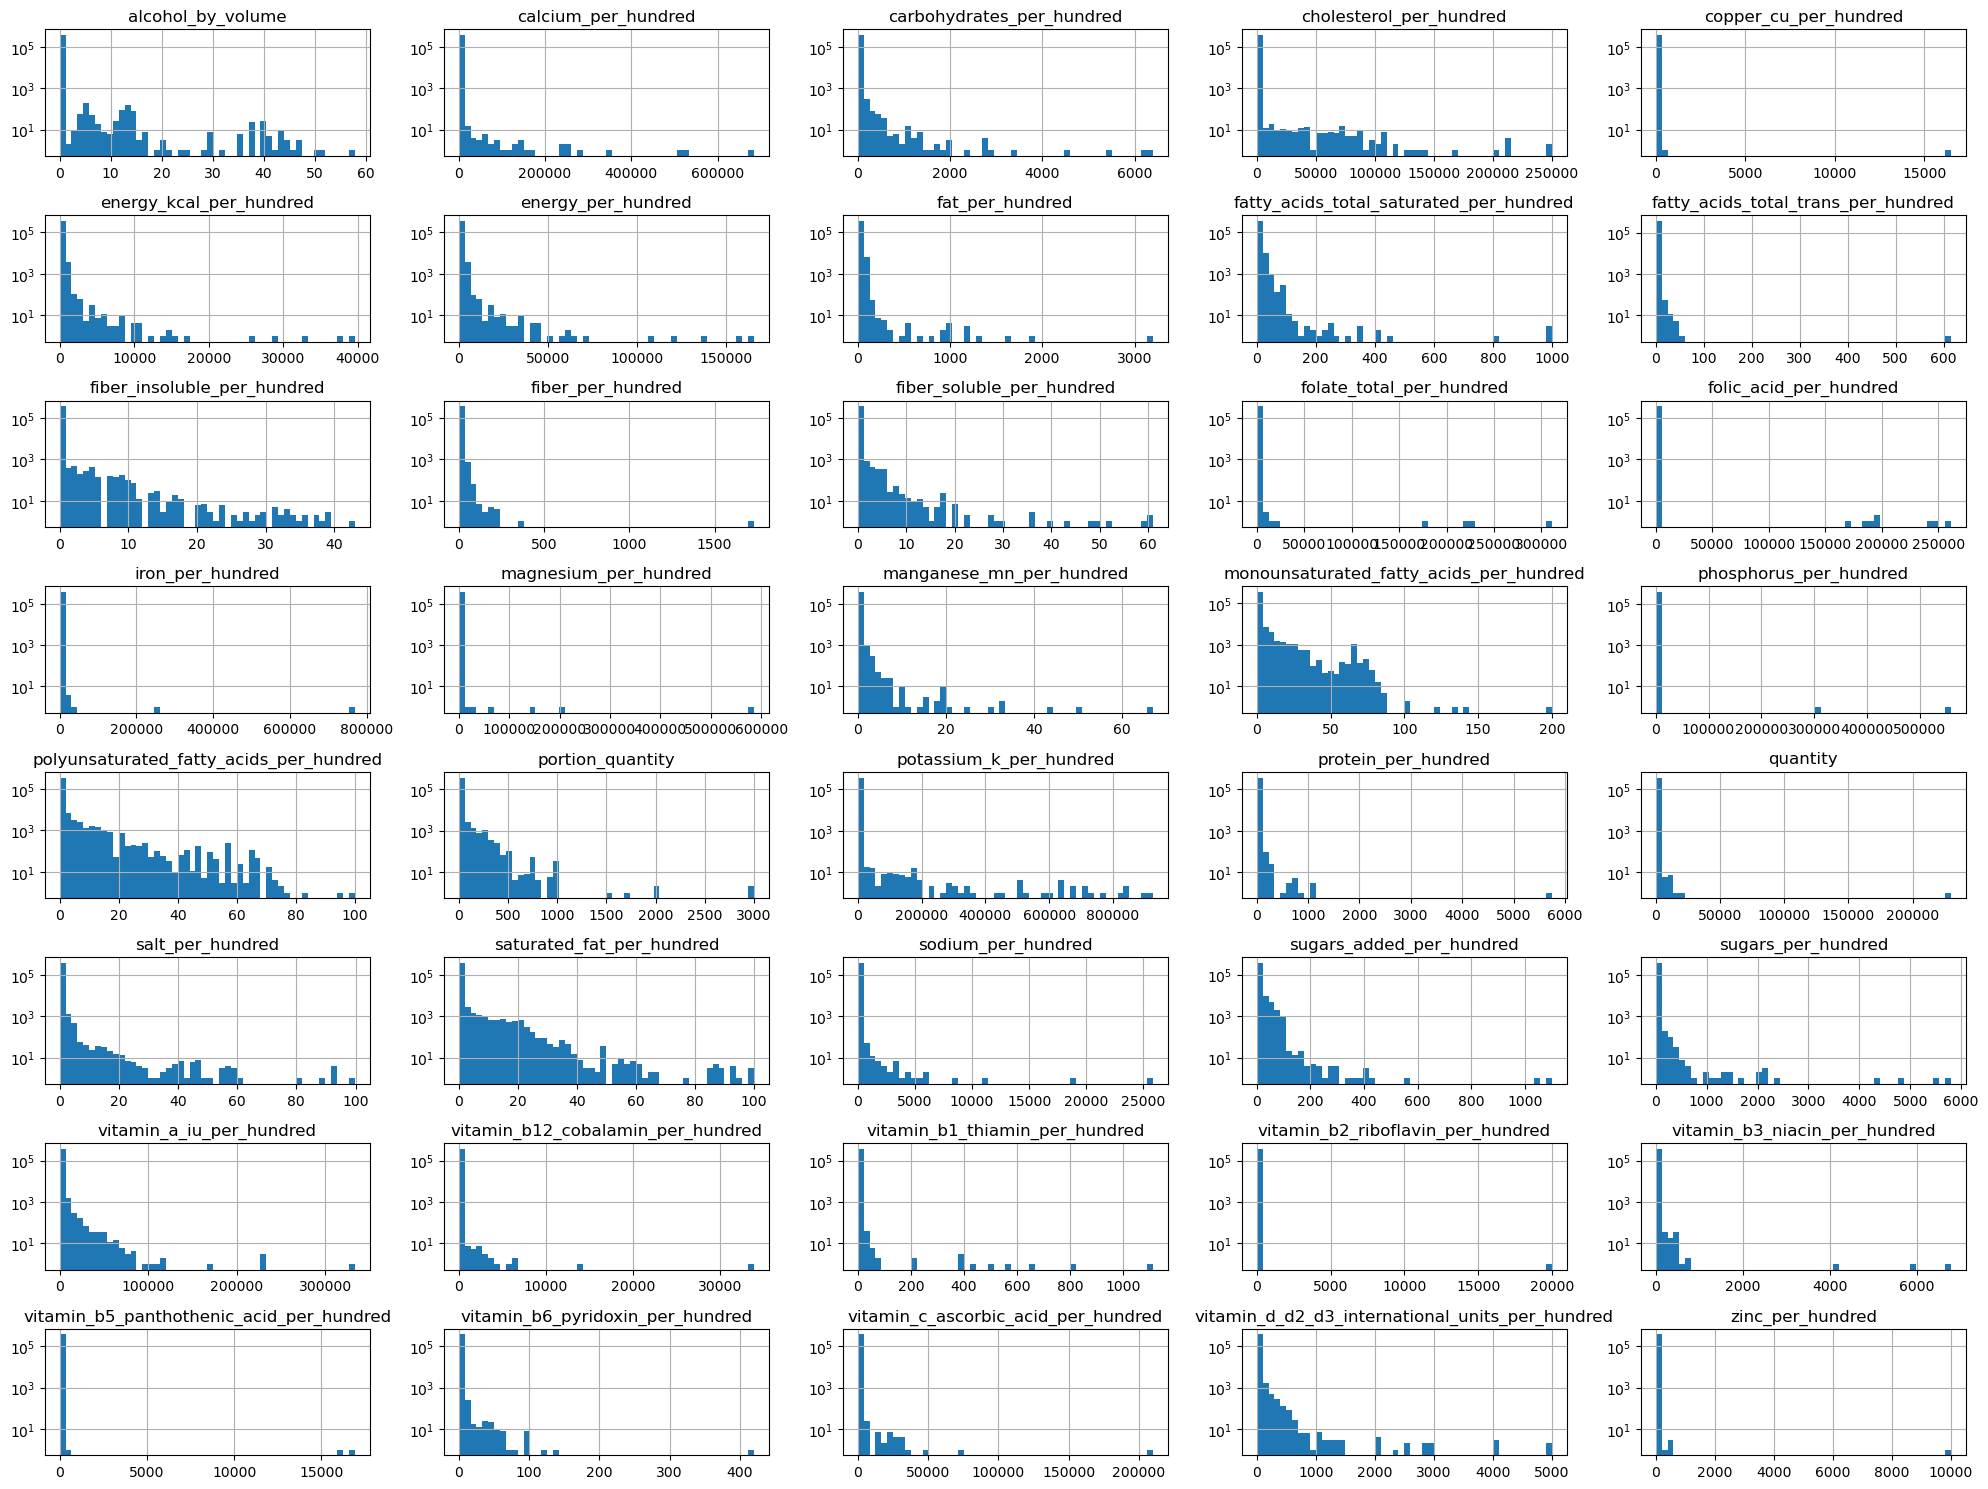

In [37]:
# Select numerical columns
num_cols = df.select_dtypes(include=['float64']).columns

# Plot histograms
df[num_cols].hist(bins=50, figsize=(20,15), layout=(-1, 5), log=True)
plt.tight_layout()
plt.show()

#### 6. Address any unrealistic values or errors. The statistics and your plots of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.) from task B5 can help you spot these values. Afterwards re-do the descriptive statistics and plots to check everything is ok now. 

In [38]:
# get an overview of all units used 
df[unit_cols].mode().transpose().head(10)

,0
calcium_unit,mg
carbohydrates_unit,g
cholesterol_unit,mg
copper_cu_unit,mg
energy_kcal_unit,kCal
energy_unit,kJ
fat_unit,g
fatty_acids_total_saturated_unit,g
fatty_acids_total_trans_unit,g
fiber_insoluble_unit,g


In [39]:
# same as previous but as a list with no duplicated values
unique_unit = pd.concat([pd.Series(df[col].unique()) for col in unit_cols], axis=0).drop_duplicates().tolist()
unique_unit

['mg', 'g', 'kCal', 'kJ', 'µg', 'ml', '?', 'l', 'kg', 'Floz', 'dl', 'IU']

In [40]:
nbline = df.shape[0] # nb of rows

for per_hundred_col, unit_col in zip(per_hundred_cols, unit_cols):
    
    # loop through each line to get the corresponding unit
    for line in range(nbline) :
        unit = df[unit_col].iloc[line]
        
        # get the 'max value' depending of the unit
        if unit == 'g' or unit == 'dl':
            max_value = 10**2
        elif unit == 'kg' or unit == 'l' or unit == 'Floz':
            max_value = 10**3
        elif unit == 'mg' or unit == 'ml':
            max_value = 10**5 
        elif unit == 'µg':
            max_value = 10**8
        elif unit == 'kj' or unit == 'kCal':
            max_value = 3700        
        elif unit == 'IU' and '_d_' in unit_col:
            max_value = 3.3 * 10**8
        elif unit == 'IU' and '_a_' in unit_col:
            max_value = 10**9
        else:
            continue
            
    # check if the value in per_hundred column is less than the max value, if not replace by '0'
    df[per_hundred_col] = df[per_hundred_col].apply(lambda x: 0 if x > max_value else x)
df

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,0.0,mg,75.00,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg
1,0.0,7610809001066,0.0,mg,1.50,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg
2,0.0,8002530159021,0.0,mg,52.68,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg
3,0.0,3033715065788,0.0,mg,70.40,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg
4,0.0,7610848492740,0.0,mg,37.00,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374879,0.0,7640145040283,0.0,mg,0.00,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg
374880,0.0,7640147023628,850.0,mg,48.60,g,0.0,mg,0.0,mg,...,45.0,mg,10.5,mg,500.0,mg,0.0,IU,37.5,mg
374881,0.0,3046920021593,0.0,mg,22.00,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg
374882,0.0,4044889004335,0.0,mg,0.00,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg


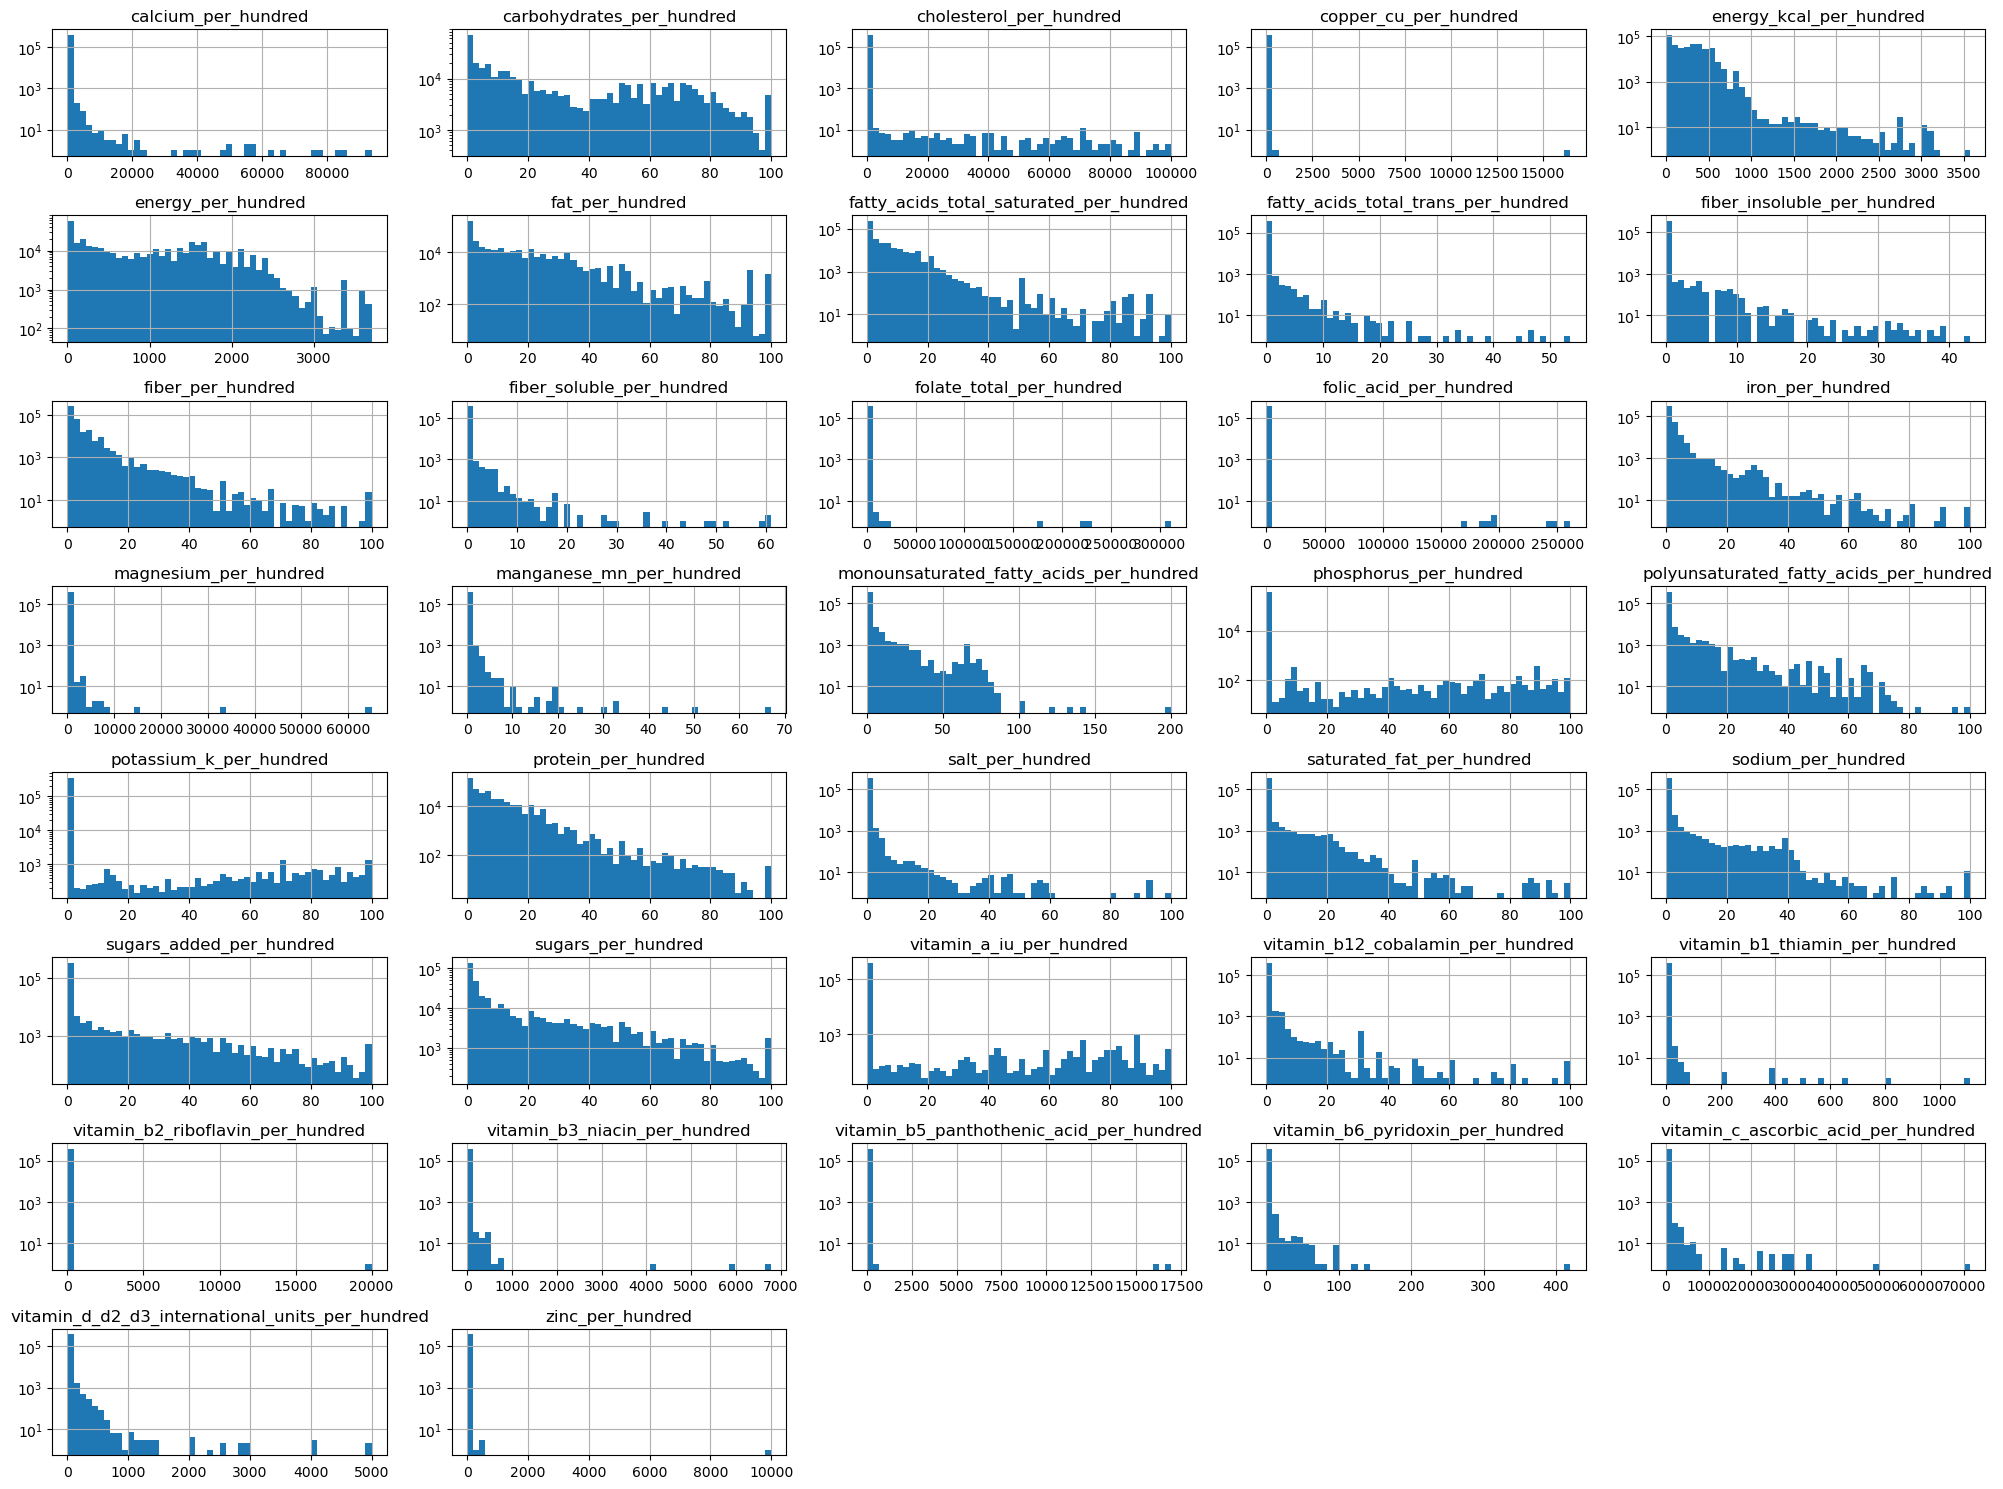

In [41]:
# Plot histograms
df[per_hundred_cols].hist(bins=50, figsize=(20,15), layout=(-1, 5), log=True)
plt.tight_layout()
plt.show()

In [42]:
df.shape

(374884, 89)

#### 7. Do you spot any other inconsistencies in the data? What about the sum of a product’s protein, fat, carbohydrates, salt, and fiber content?

In [43]:
# we can check if the sum of all '_per_hundred' rows is positive. if not we can delete rows where there is no datas in it.  

# sum the values of 'per_hundred' columns :
df['sum_per_hundred']=df[per_hundred_cols].sum(axis=1)
df.sort_values(by='sum_per_hundred', ascending=True).head()

# we can notice that values are egale to '0'

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,...,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,sum_per_hundred
374883,0.0,7613379866622,0.0,mg,0.0,g,0.0,mg,0.0,mg,...,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg,0.0
281654,0.0,0011110881748,0.0,mg,0.0,g,0.0,mg,0.0,mg,...,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg,0.0
28176,0.0,4316268538671,0.0,mg,0.0,g,0.0,mg,0.0,mg,...,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg,0.0
28177,0.0,4316268539159,0.0,mg,0.0,g,0.0,mg,0.0,mg,...,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg,0.0
28178,0.0,4316268539197,0.0,mg,0.0,g,0.0,mg,0.0,mg,...,mg,0.0,mg,0.0,mg,0.0,IU,0.0,mg,0.0


In [44]:
# mask which has 'True' for every sample that needs to be dropped
entries_to_drop = df['sum_per_hundred'] == 0
print("Number of entries to drop :", entries_to_drop.sum())

# Dropping these entries by only selecting the samples that shouldn't be dropped
df = df[~entries_to_drop]

Number of entries to drop : 28870


In [45]:
df.shape

(346014, 90)

In [46]:
# sum the values of specified columns and show them :
g_per_hundred_lst=['protein_per_hundred','fat_per_hundred','carbohydrates_per_hundred','salt_per_hundred','fiber_per_hundred']
df = df.copy()
df['sum_per_hundred_g']=df[g_per_hundred_lst].sum(axis=1)
g_per_hundred_lst.append('sum_per_hundred_g')
df[g_per_hundred_lst].sort_values(by='sum_per_hundred_g', ascending=False).head()

# we can notice than values are over 100 which is not possible 

,protein_per_hundred,fat_per_hundred,carbohydrates_per_hundred,salt_per_hundred,fiber_per_hundred,sum_per_hundred_g
342663,100.00,0.00,100.00,0.0,100.0,300.00
370472,100.00,0.00,100.00,0.0,100.0,300.00
314755,16.67,91.67,91.67,0.0,75.0,275.01
330395,87.50,50.00,100.00,0.0,12.5,250.00
344164,87.50,50.00,100.00,0.0,12.5,250.00


In [47]:
# mask which has 'True' for every sample that needs to be dropped
entries_to_drop = df['sum_per_hundred_g'].gt(100)
print("Number of entries to drop :", entries_to_drop.sum())

# Dropping these entries by only selecting the samples that shouldn't be dropped
df = df[~entries_to_drop]

Number of entries to drop : 28261


In [48]:
# check the max value
df['sum_per_hundred_g'].max()

100.0

In [49]:
df.shape

(317753, 91)

#### 8. Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers.

##### Using Z-scores to identify outlier candidates :

In [50]:
zscores_df_per_100 = (df[per_hundred_cols] - df[per_hundred_cols].mean()) / (df[per_hundred_cols].std())
zfilter_df = np.abs(zscores_df_per_100) > 3

In [51]:
print("Number of outliers detected per feature using z-scores:")
print(zfilter_df.sum(axis=0))
print("\nTotal number of outliers detected:", zfilter_df.sum(axis=0).sum())

Number of outliers detected per feature using z-scores:
calcium_per_hundred                                  342
carbohydrates_per_hundred                              0
cholesterol_per_hundred                              155
copper_cu_per_hundred                                  2
energy_kcal_per_hundred                             2296
energy_per_hundred                                  3263
fat_per_hundred                                     6069
fatty_acids_total_saturated_per_hundred             3287
fatty_acids_total_trans_per_hundred                 1551
fiber_insoluble_per_hundred                         1499
fiber_per_hundred                                   4923
fiber_soluble_per_hundred                           1407
folate_total_per_hundred                               7
folic_acid_per_hundred                                 7
iron_per_hundred                                    4231
magnesium_per_hundred                                194
manganese_mn_per_hundred        

Almost 1/3 of the dataframe is detected as outliers. 

In task B3, we filled NaN values by 0 (assumption that products are free of "product"_per_hundred).

Z-score is calculated with mean and standard deviation which influenced by '0' values, let's recalculated mean and standard deviation without '0'.

In [52]:
df_filtered = df[df[per_hundred_cols] != 0].loc[:, per_hundred_cols] # Filter out the rows with 0 values
zscores_df_per_100_2= (df[per_hundred_cols] - df_filtered.mean()) / (df_filtered.std())
zfilter_df_2 = np.abs(zscores_df_per_100_2) > 3

In [53]:
print("Number of outliers detected per feature using z-scores:")
print(zfilter_df_2.sum(axis=0))
print("\nTotal number of outliers detected:", zfilter_df_2.sum(axis=0).sum())

Number of outliers detected per feature using z-scores:
calcium_per_hundred                                 184
carbohydrates_per_hundred                             0
cholesterol_per_hundred                             146
copper_cu_per_hundred                                 1
energy_kcal_per_hundred                            2274
energy_per_hundred                                 3263
fat_per_hundred                                    5316
fatty_acids_total_saturated_per_hundred            1523
fatty_acids_total_trans_per_hundred                 102
fiber_insoluble_per_hundred                          19
fiber_per_hundred                                  1947
fiber_soluble_per_hundred                            13
folate_total_per_hundred                              3
folic_acid_per_hundred                                5
iron_per_hundred                                   2769
magnesium_per_hundred                                41
manganese_mn_per_hundred                        

Outliers represent now around 10% of the dataframe

In [54]:
#Let's drop rows with outliers
zfilter_any = zfilter_df_2.any(axis=1)
outliers = df.loc[zfilter_any, :]
df = df.drop(outliers.index, axis=0)
df.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,...,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,sum_per_hundred,sum_per_hundred_g
0,0.0,8001772000030,0.0,mg,75.00,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,IU,0.0,mg,1945.42,86.42
1,0.0,7610809001066,0.0,mg,1.50,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,IU,0.0,mg,1303.50,39.00
2,0.0,8002530159021,0.0,mg,52.68,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,IU,0.0,mg,1770.64,84.06
3,0.0,3033715065788,0.0,mg,70.40,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,IU,0.0,mg,2245.20,94.20
4,0.0,7610848492740,0.0,mg,37.00,g,0.0,mg,0.0,mg,...,0.0,mg,0.0,mg,0.0,IU,0.0,mg,3215.06,98.06


In [55]:
df.shape

(295480, 91)

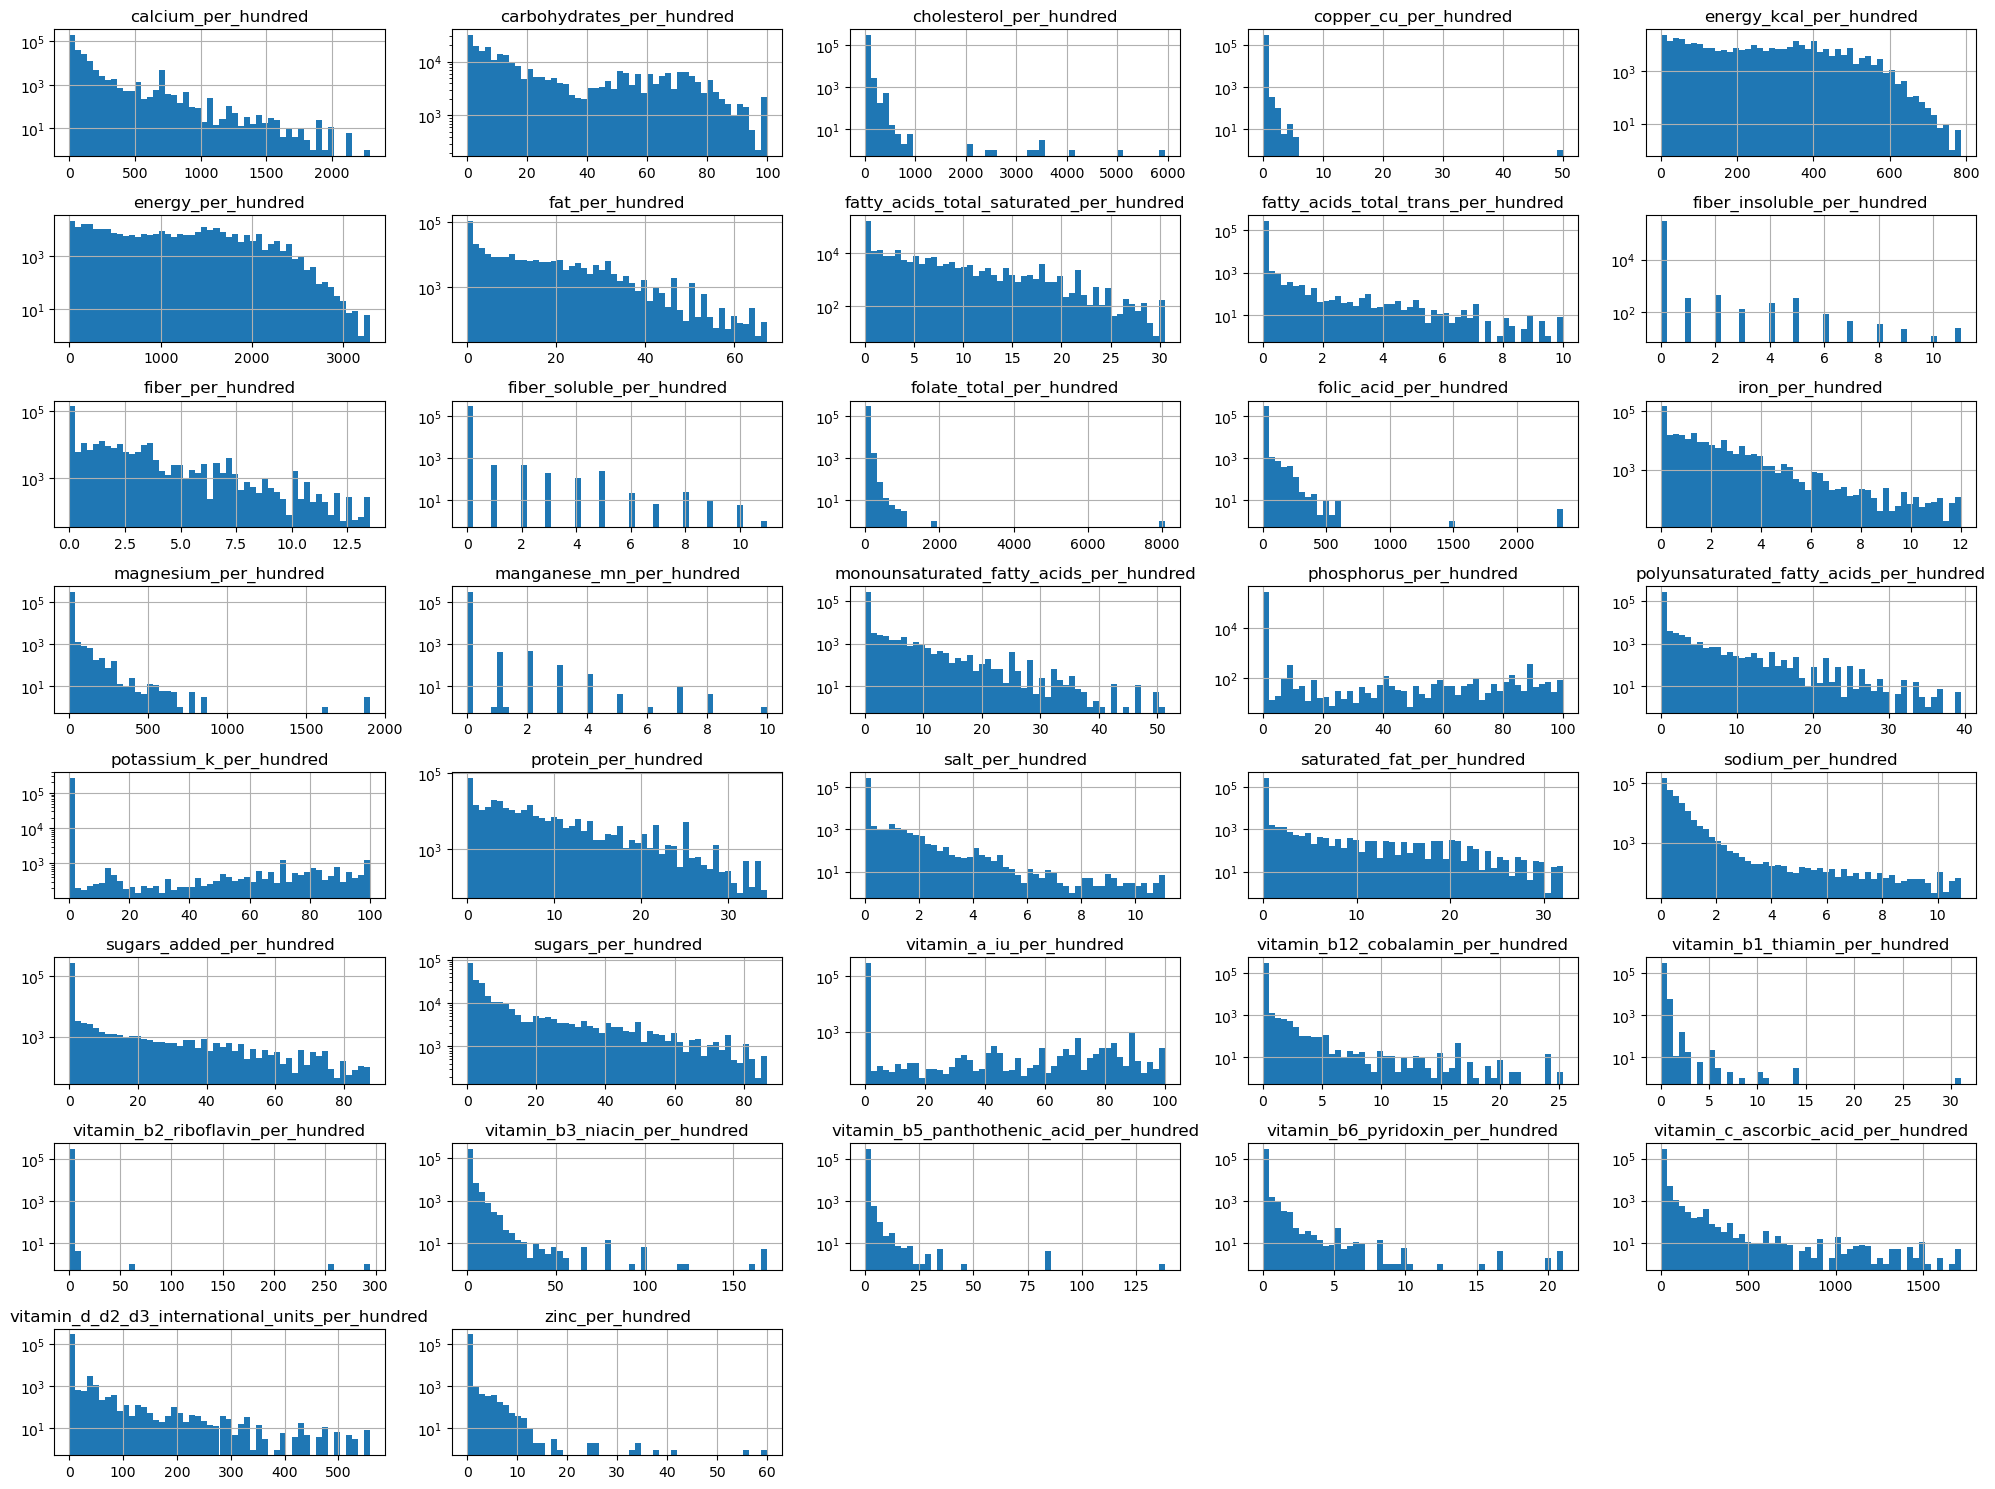

In [56]:
# Plot histograms
df[per_hundred_cols].hist(bins=50, figsize=(20,15), layout=(-1, 5), log=True)
plt.tight_layout()
plt.show()

# C. In-depth Exploratory Data Analysis

* What is the total number of samples by country? Countries with very small sample size should be dropped from this analysis as their results may not be statistically significant.

In [57]:
# Samples by country
df['country'].value_counts()

US    272993
CH     21291
DE       895
IT       250
FR        49
AT         1
UK         1
Name: country, dtype: int64

In [58]:
# Drop rows where the number of samples by 'Country'  is AT and UK
df = df.drop(df[df['country'].isin(['UK','AT'])].index)

In [59]:
df['country'].value_counts()

US    272993
CH     21291
DE       895
IT       250
FR        49
Name: country, dtype: int64

In [60]:
df.shape

(295478, 91)

* Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?

In [61]:
# number of 'organics' or 'bio' products
organic = df['product_name_en'].str.contains('bio|organic').sum()

# non organic products are all the other products
non_organic =df.shape[0] - df['product_name_en'].str.contains('bio|organic').sum()

print('Organic products : ', organic)
print('Non organic products : ', non_organic)

Organic products :  321
Non organic products :  295157


In [62]:
countries = ['US','CH','DE','IT','FR']

# Create an empty dataframe to store the results
result = pd.DataFrame(columns=['country', 'organic', 'non_organic', 'organic_perc'])

# Loop through the countries list 
for country in countries:
    df1 = df[df['country'] == str(country)]
    organic = df1['product_name_en'].str.contains('bio|organic').sum()
    non_organic = df1.shape[0]-organic
    organic_perc = (organic*100 / df1.shape[0]).round(1)
    
    # Append the results to the result dataframe
    result = result.append({'country': country, 'organic': organic, 'non_organic': non_organic, 'organic_perc':organic_perc}, ignore_index=True)

result.sort_values(by='organic_perc', ascending=False).set_index('country')

,organic,non_organic,organic_perc
country,,,
IT,4,246,1.6
DE,13,882,1.5
CH,290,21001,1.4
US,14,272979,0.0
FR,0,49,0.0


with 1.6%, Italy is the country with the higher percentage of organic products.

*  Compare the distributions of the macronutrients between organic and non-organic products in each country. Your solution method should include appropriate visualisations in the subplots format.

In [63]:
df['organic'] = df['product_name_en'].apply(lambda x: 'y' if isinstance(x, str) and ('organic' in x.lower() or 'bio' in x.lower()) else 'n')

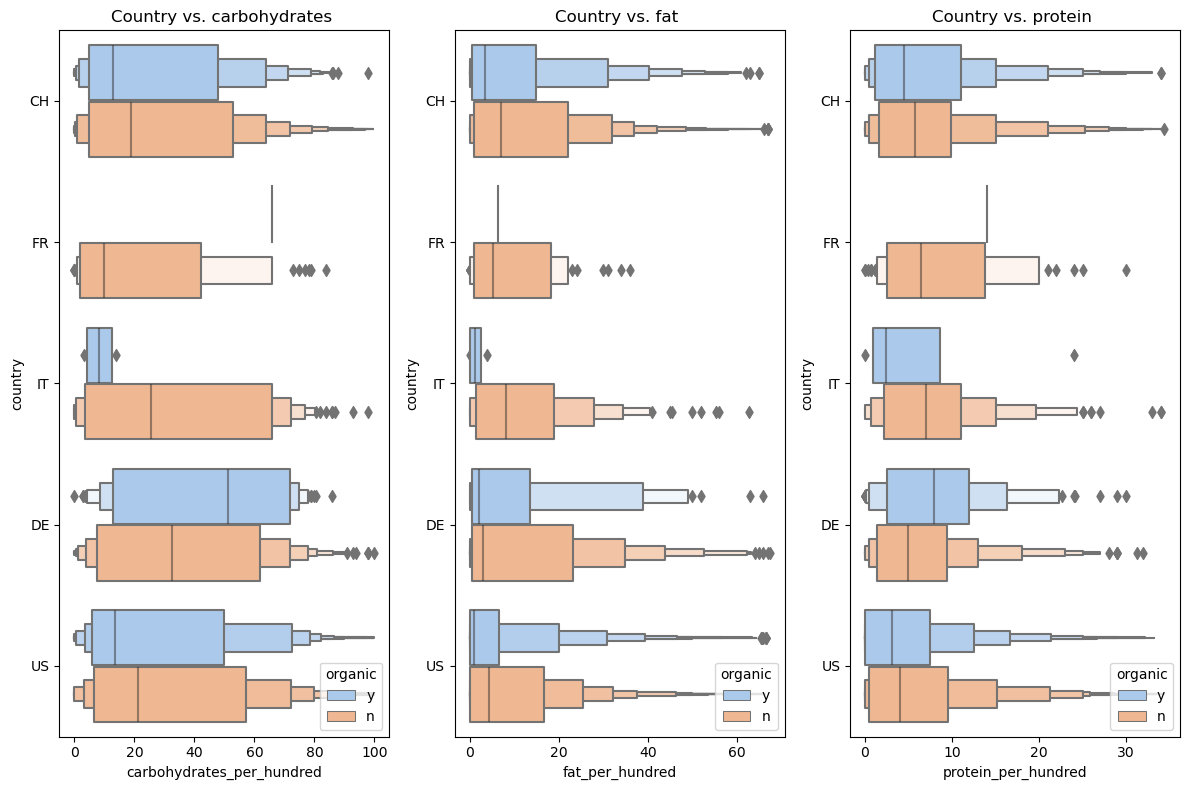

In [64]:
# Define the columns to plot
macronutrients = ['carbohydrates_per_hundred','fat_per_hundred','protein_per_hundred']

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 8), sharey=False)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, macronutrient in enumerate(macronutrients):
    sns.boxenplot(data=df, 
                  x=macronutrient, 
                  y="country", 
                  ax=axes[i], 
                  hue='organic', 
                  palette="pastel")
    macronut = macronutrient.replace("per_hundred", "").replace("_", " ")
    axes[i].set_title('Country vs. '+macronut)

fig.tight_layout()
plt.show()

# D. Text data

#### 1. Find the product with the longest ingredients list, i.e. the largest number of ingredients. Print the product name and its ingredient list.

In [65]:
# convert 'ingredient' as string
df['ingredients_en'] = df['ingredients_en'].astype(str) 

# in a new column : split each word of the ingredient and count how many words are in the list
df['word_count'] = df['ingredients_en'].str.split().apply(len) 

# creat a new dataframe, sort by 'word_count' and show the longuest
df_product = df[['product_name_en', 'ingredients_en','word_count']].sort_values(by='word_count', ascending=False).head(1) 

name = df_product.iat[0,0]
print('product with the longest ingredients list : ', name)

ingredient = df_product.iat[0,1]
print('\nIngredient list : ', ingredient)

product with the longest ingredients list :  Gamesa Lonchera Assorted Cookies 14.3 Ounce 5 Pack Box

Ingredient list :  Arcoiris: Enriched Flour (Wheat Flour, Niacinamide, Ferrous Fumarate, Thiamin Mononitrate, Riboflavin, Folic Acid), Sugar, High Fructose Corn Syrup, Corn Syrup, Vegetable Oil Blend (Palm Oil, Sunflower Oil and/or Canola Oil and/or Soybean Oil, [Contains Ascorbyl Palmitate, Tocopherols and TBHQ as Preservatives]), Coconut (with Sodium Metabisulfite [Preservative]), Corn Starch, Contains 2% or Less of: Gelatin, Soy Flour, Salt, Leavening Agents (Sodium Bicarbonate, Ammonium Bicarbonate, Aluminum Sodium Sulfate), Artificial Flavor, Soy Lecithin, Propylene Glycol Monostearate, FD&C Red 3, FD&C Red 40, FD&C Yellow 5, FD&C Yellow 6, FD&C Blue 1, Glyceryl Monostearate, Hydrolyzed Soy Protein, Sodium Stearoyl Lactylate, Calcium Sulfate, Zinc Oxide, Sodium Hexametaphosphate, Caramel Color. CONTAINS WHEAT, COCONUT, AND SOY INGREDIENTS. MAY CONTAIN TRACES OF MILK, EGG, PEANUTS A

#### 2. Find the products with the shortest ingredients list, i.e. the fewest ingredients. Display some examples and comment on your observation.

In [66]:
df['word_count'] = df['ingredients_en'].str.split().str.len()

# replace the value 'ingredients_en_missing' with 0 in the 'token_count' column
df['word_count'] = df['word_count'].where(df['ingredients_en'] != 'ingredients_en_missing', 0)

df_product=df[['product_name_en', 'ingredients_en', 'word_count']]
df_product[df_product['word_count']>0].sort_values(by='word_count', ascending=True).head(10)

,product_name_en,ingredients_en,word_count
109248,MANGOS,MANGOS.,1
330455,FRESHLY FROZEN UNSWEETENED BLUEBERRIES,BLUEBERRIES.,1
338244,"SO CAL RAW & UNFILTERED HONEY, SO CAL",HONEY,1
288676,8 MINI CORN COBS,CORN.,1
354501,100% NATURAL CORN ON THE COB,CORN.,1
53538,4 OZ DOM LAMB LOIN CHOP,Lamb,1
226363,BROCCOLI CUTS,BROCCOLI.,1
167656,WATERMELON SPEARS,WATERMELON.,1
317770,RAW WALNUT PIECES,WALNUTS.,1
53530,SPECIAL CRABMEAT- FZN,Crab.,1


#### 3. Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings.

In [67]:
# Normalize the text
df['ingredients_en_txt'] = df['ingredients_en'].str.lower()
df['ingredients_en_txt'] = df['ingredients_en_txt'].str.replace(r'[^\w\s]','', regex=True)
df['ingredients_en_txt'] = df['ingredients_en_txt'].str.split()
df['ingredients_en_txt'] = df['ingredients_en_txt'].fillna("")

In [68]:
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords

# Convert the list of words to a list of sentences (required for Phrases)
sentences = df['ingredients_en_txt'].dropna().tolist()

# Use Phrases to detect common phrases
phrases = Phrases(sentences, min_count=3, threshold=1)

# Convert the detected phrases into a more efficient form
bigram = Phraser(phrases)

# Apply the detected phrases to the sentences to group similar words together
sentences_phrased = [bigram[sentence] for sentence in sentences]

# Convert the sentences back into a list of words (required for further analysis)
words_phrased = [word for sentence in sentences_phrased for word in sentence]

# Define a list of words to exclude
exclude_words = stopwords.words('english')

# Count the occurrences of each word
word_counts = pd.Series(words_phrased).value_counts()

# Drop the words to exclude that are present in the word_counts series
word_counts = word_counts[~word_counts.index.isin(exclude_words)]

# Print the result
print(word_counts.head(10))

salt           323030
sugar          203599
water          188726
organic        141327
oil            133710
milk           121547
natural        118872
citric_acid     87150
wheat_flour     83104
corn            79916
dtype: int64


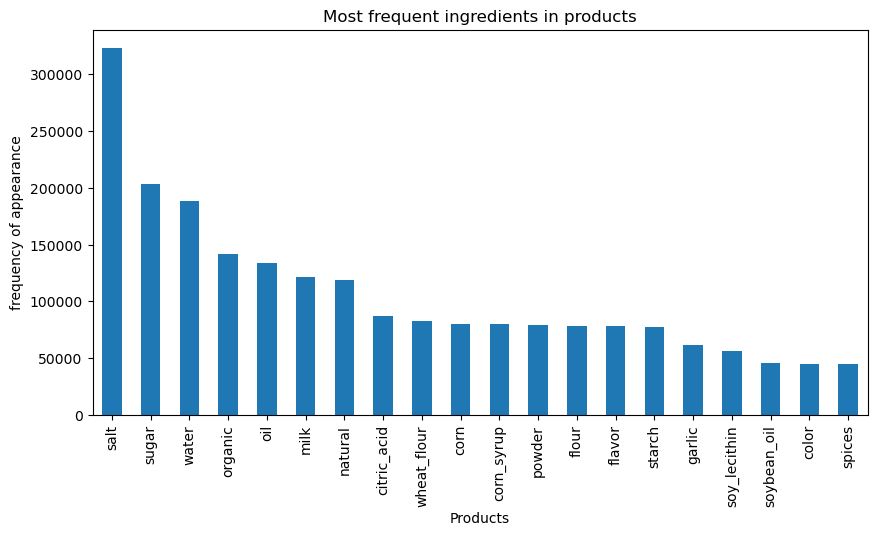

In [69]:
# Plot the most frequent products
word_counts.head(20).plot(kind='bar',
                          figsize=(10, 5), 
                          title="Most frequent ingredients in products", 
                          xlabel='Products', 
                          ylabel='frequency of appearance')
plt.show()

# E. Time-series data

#### 1.Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x-axis and the months (1 to 12) on the y-axis. The color of the heatmap should show the number of items created at each month-hour pair.

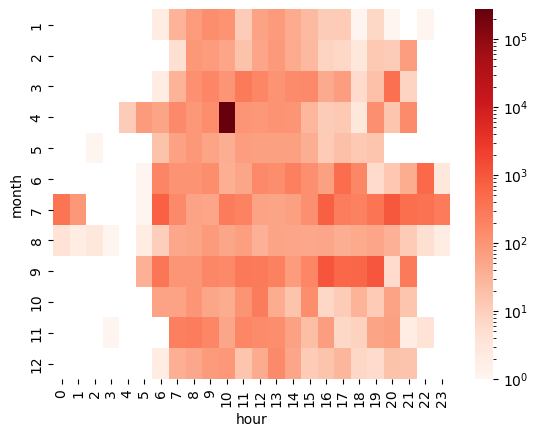

In [70]:
from matplotlib.colors import LogNorm

# Convert the created_at column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the month and hour information from the created_at column
df['month'] = df['created_at'].dt.month
df['hour'] = df['created_at'].dt.hour

# Create a pivot table to count the number of items created each month at each hour
table = df.pivot_table(index='month', columns='hour', aggfunc='size', fill_value=0)

# Draw the heatmap
sns.heatmap(table, cmap='Reds', norm=LogNorm())

plt.show()

#### 2.Your task is to investigate the evolution of the total number of items over time. 

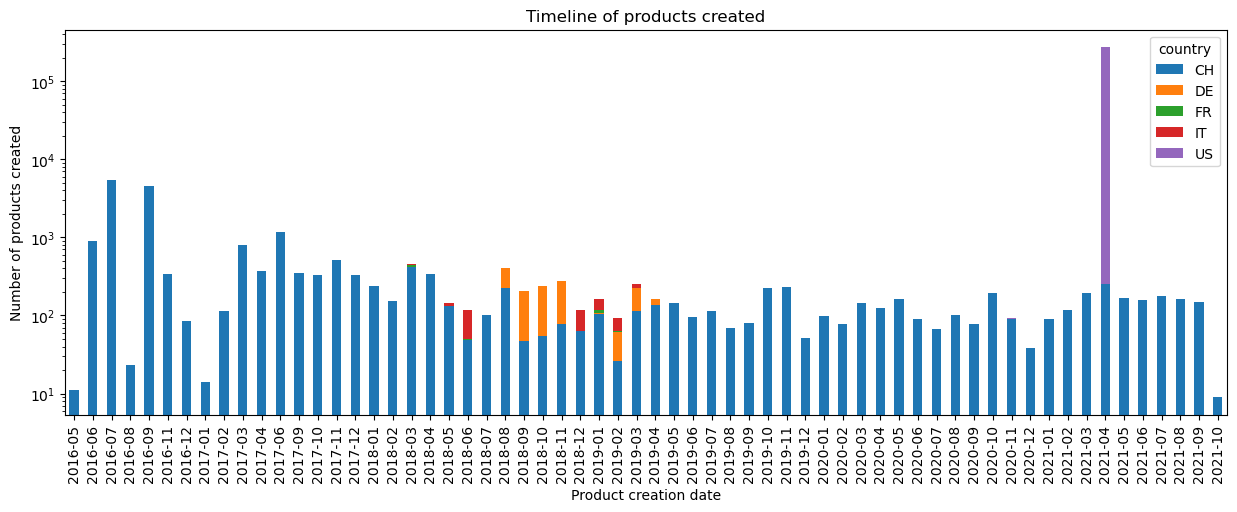

In [71]:
# Convert the created_at column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the month information from the created_at column
df['month'] = df['created_at'].dt.strftime('%Y-%m')

# Group the data by month and country and count the number of items created each month by each country
grouped = df.groupby(['month', 'country']).size().reset_index(name='count')

# Pivot the data to create a table with the months as the index, the countries as the columns, and the counts as the values
pivot_table = grouped.pivot(index='month', columns='country', values='count')

# Draw the bar plot
pivot_table.plot(kind='bar', 
                 stacked=True, 
                 figsize=(15, 5), 
                 logy=True, 
                 title="Timeline of products created", 
                 xlabel='Product creation date', 
                 ylabel='Number of products created')

plt.show()

# F. Correlation analysis

#### 1.Your task is to quantify the linear relationships between the energy_per_hundred and other numerical variables.

In [72]:
# Creat a dataframe with 'per_hundred_cols'
df_corr=df[per_hundred_cols]

In [73]:
df_corr = df_corr.corr(method="pearson") #Compute correlation of all columns
df_corr

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
calcium_per_hundred,1.000000,-0.114458,0.284512,0.013420,0.165517,0.165623,0.266678,0.449670,-0.001993,0.022456,...,-0.015664,0.052617,0.027894,0.013946,0.039993,0.022904,0.057915,-0.020673,0.130981,0.071616
carbohydrates_per_hundred,-0.114458,1.000000,-0.214531,0.000415,0.600627,0.601520,0.014627,0.015782,0.021539,0.066043,...,-0.068297,0.014697,0.145200,0.023229,0.120063,0.005516,0.041973,0.020575,-0.021082,0.042586
cholesterol_per_hundred,0.284512,-0.214531,1.000000,-0.011210,0.082946,0.083032,0.236500,0.351899,0.023440,-0.021551,...,0.020878,-0.006860,-0.034674,-0.006288,-0.039622,-0.008788,-0.022440,-0.043759,0.009276,-0.010140
copper_cu_per_hundred,0.013420,0.000415,-0.011210,1.000000,0.045221,0.045240,0.060705,0.014780,-0.002741,0.006358,...,-0.004374,0.031851,0.027784,0.013459,0.066347,0.052127,0.038951,0.006123,0.038476,0.224141
energy_kcal_per_hundred,0.165517,0.600627,0.082946,0.045221,1.000000,0.998599,0.690002,0.500740,0.051241,0.019957,...,-0.080495,-0.004380,0.066084,0.007589,0.059530,-0.003612,0.007345,-0.044435,-0.030876,0.042224
energy_per_hundred,0.165623,0.601520,0.083032,0.045240,0.998599,1.000000,0.689539,0.500986,0.051269,0.019973,...,-0.080494,-0.004357,0.066138,0.007602,0.059611,-0.003579,0.007382,-0.044398,-0.030865,0.042250
fat_per_hundred,0.266678,0.014627,0.236500,0.060705,0.690002,0.689539,1.000000,0.710543,0.063946,0.002277,...,-0.043737,-0.026728,-0.047776,-0.008352,-0.035098,-0.014248,-0.019976,-0.075280,-0.034081,0.024477
fatty_acids_total_saturated_per_hundred,0.449670,0.015782,0.351899,0.014780,0.500740,0.500986,0.710543,1.000000,0.051320,-0.011400,...,-0.034927,-0.021454,-0.054528,-0.009566,-0.051156,-0.010036,-0.022898,-0.066412,-0.017526,0.004885
fatty_acids_total_trans_per_hundred,-0.001993,0.021539,0.023440,-0.002741,0.051241,0.051269,0.063946,0.051320,1.000000,0.000552,...,0.003254,-0.005387,-0.001766,-0.000597,-0.007395,-0.003409,-0.005171,-0.006942,-0.007977,-0.002959
fiber_insoluble_per_hundred,0.022456,0.066043,-0.021551,0.006358,0.019957,0.019973,0.002277,-0.011400,0.000552,1.000000,...,-0.001500,0.033925,0.050728,0.011264,0.061312,0.010378,0.038398,-0.000731,0.047975,0.071193


In [74]:
#Compute correlation of all columns
df_corr = df_corr.corr(method="pearson") 

#filter on 'energy_per_hundred' and sort values
df_corr['energy_per_hundred'].sort_values(ascending=False).round(3)

energy_per_hundred                                 1.000
energy_kcal_per_hundred                            1.000
fat_per_hundred                                    0.814
fatty_acids_total_saturated_per_hundred            0.697
carbohydrates_per_hundred                          0.671
sugars_per_hundred                                 0.542
fiber_per_hundred                                  0.435
iron_per_hundred                                   0.423
protein_per_hundred                                0.400
sugars_added_per_hundred                           0.292
saturated_fat_per_hundred                          0.245
monounsaturated_fatty_acids_per_hundred            0.232
calcium_per_hundred                                0.228
polyunsaturated_fatty_acids_per_hundred            0.178
cholesterol_per_hundred                            0.123
fatty_acids_total_trans_per_hundred                0.020
sodium_per_hundred                                 0.009
salt_per_hundred               

#### 2.Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated variables (in absolute terms) with the energy_per_hundred column.

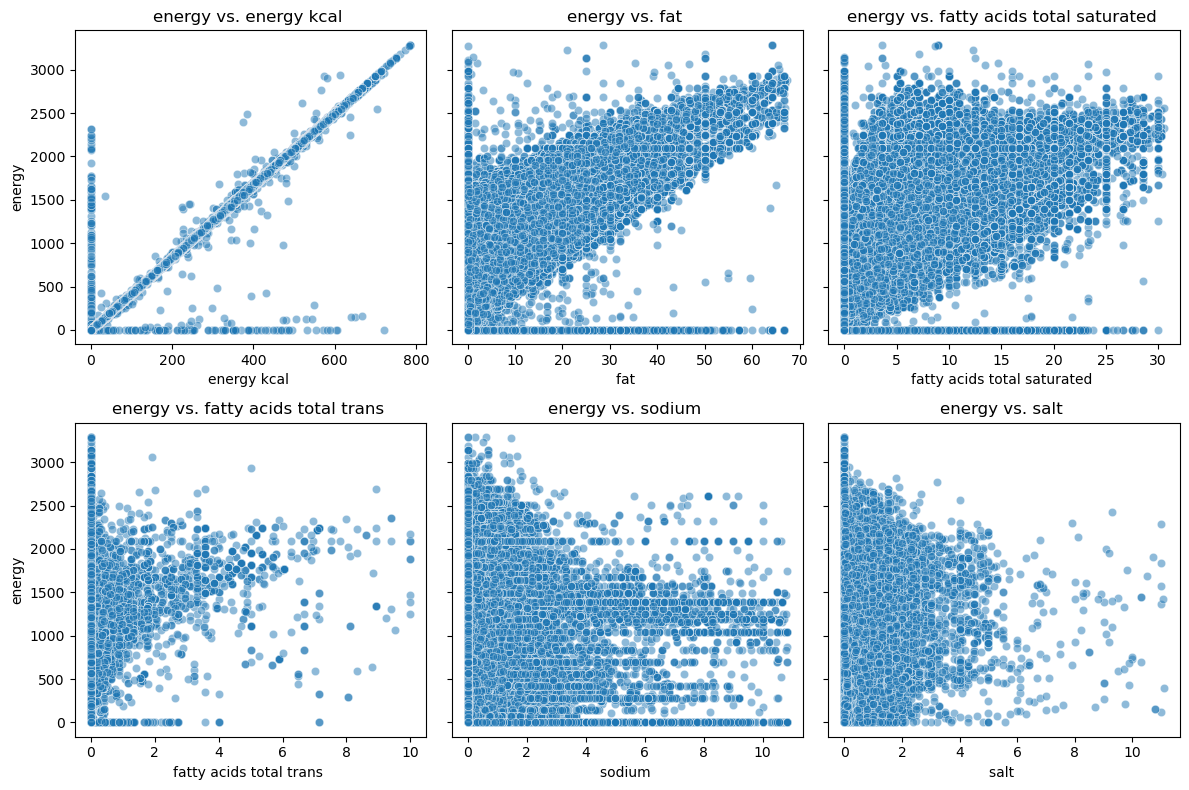

In [75]:
# Define the columns to plot
columns = ['energy_kcal_per_hundred','fat_per_hundred','fatty_acids_total_saturated_per_hundred','fatty_acids_total_trans_per_hundred','sodium_per_hundred','salt_per_hundred']

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 8), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(columns):
    sns.scatterplot(data=df, 
                    x=col, 
                    y="energy_per_hundred", 
                    ax=axes[i], 
                    alpha=0.5)
    axes[i].set_ylabel('energy')
    col = col.replace("per_hundred", "").replace("_", " ")
    axes[i].set_xlabel(col)
    axes[i].set_title('energy vs. '+col)

fig.tight_layout()
plt.show()

The three plots on the top are the most correlated.
-	The correlation between energy and energy Kcal is almost perfect.
-	we can clearly see the linear relationship between the two most correlated. 

The three bottom plots are the least correlated, we do not see relationship between values.

Correlation could have been different without ‘0’ values filled instead of NaN values

#### 3.Your task is to test the independence of two categorical variables statistically.

In [76]:
from scipy.stats import chi2_contingency

# Group the values in the "energy_per_hundred" column into three categories
df['energy_level'] = pd.qcut(df['energy_per_hundred'], q=[0, .33, .66, 1], labels=['low', 'medium', 'high'])

# Create a contingency table of the frequency of each combination of energy level and country
ct = pd.crosstab(df['energy_level'], df['country'])

# Perform a chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(ct)

# Print the results
print("Chi-squared test statistic:", chi2.round(2))
print("p-value:", p.round(3))

# Check if the p-value is less than the significance level
if p < 0.05:
    print("Reject the null hypothesis - There is a significant association between energy level and country.")
else:
    print("Fail to reject the null hypothesis - There is no significant association between energy level and country.")

Chi-squared test statistic: 499.16
p-value: 0.0
Reject the null hypothesis - There is a significant association between energy level and country.


In [77]:
ct

country,CH,DE,FR,IT,US
energy_level,,,,,
low,5959,235,16,62,91308
medium,7088,196,19,59,90073
high,8244,464,14,129,91612
